Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential

In [3]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/MyDrive/MS Assignments/Melanoma detection/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/drive/MyDrive/MS Assignments/Melanoma detection/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    image_size = (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb',
    subset='training'
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    image_size = (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb',
    subset='validation'
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

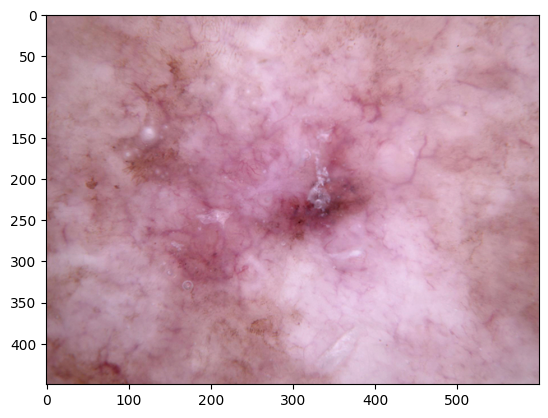

In [10]:
image = plt.imread((list(data_dir_train.glob(class_names[0]+'/*.jpg'))[0]))
plt.imshow(image)
### your code goes here, you can use training or validation data to visualize

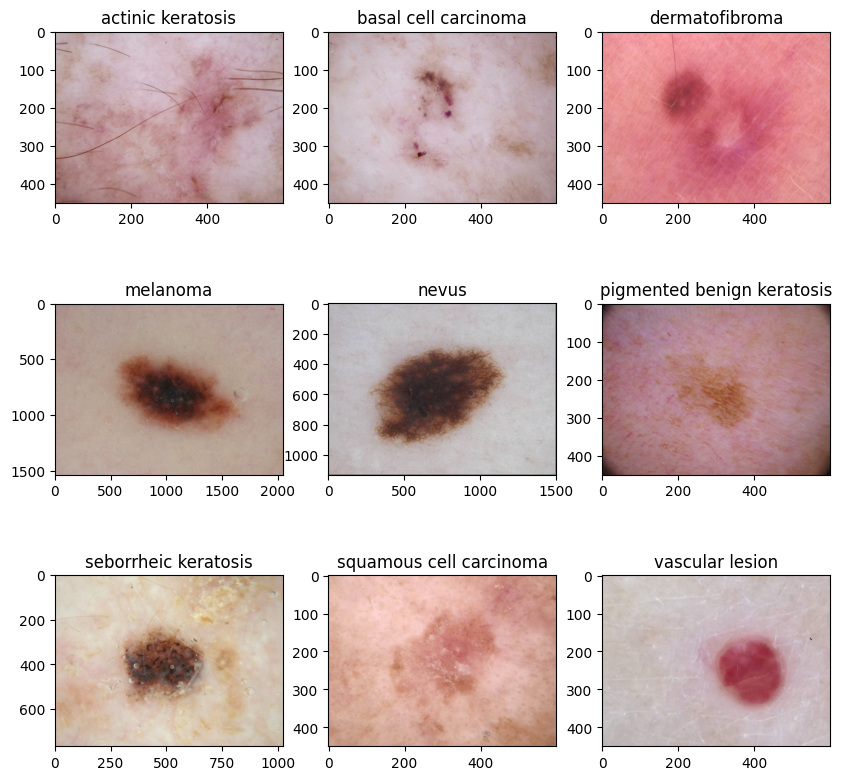

In [11]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)
### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
len(train_ds)

56

from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [14]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [15]:
# CNN Model
num_classes=  9
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

# scaling the pixel values from 0-255 to 0-1
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# Convolution layer with 64 features, 7x7 filter and relu activation with 2x2 pooling
model.add(Conv2D(filters = 64, kernel_size = (7,7),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# Convolution layer with 16 features, 3x3 filter and relu activation with 2x2 pooling
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# Convolution layer with 128 features, 11x11 filter and relu activation with 2x2 pooling
model.add(Conv2D(filters = 128, kernel_size = (11,11),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# Convolution layer with 256 features, 3x3 filter and relu activation with 2x2 pooling
model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [16]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [17]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        3

### Train the model

In [18]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 344s 1s/step - loss: 2.0847 - accuracy: 0.1763 - val_loss: 2.0441 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 3s 56ms/step - loss: 2.0403 - accuracy: 0.1987 - val_loss: 2.0361 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 3s 57ms/step - loss: 2.0320 - accuracy: 0.1903 - val_loss: 2.0359 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 3s 53ms/step - loss: 1.9311 - accuracy: 0.2790 - val_loss: 1.8043 - val_accuracy: 0.3378
Epoch 5/20
56/56 [==============================] - 3s 50ms/step - loss: 1.8445 - accuracy: 0.2902 - val_loss: 1.7202 - val_accuracy: 0.3803
Epoch 6/20
56/56 [==============================] - 3s 50ms/step - loss: 1.8231 - accuracy: 0.2991 - val_loss: 1.7537 - val_accuracy: 0.3221
Epoch 7/20
56/56 [==============================] - 3s 53ms/step - loss: 1.7324 - accuracy: 0.3493 - val_loss: 1.6399 - val_accuracy: 0.4027
Epoch 8/20
56

### Visualizing training results

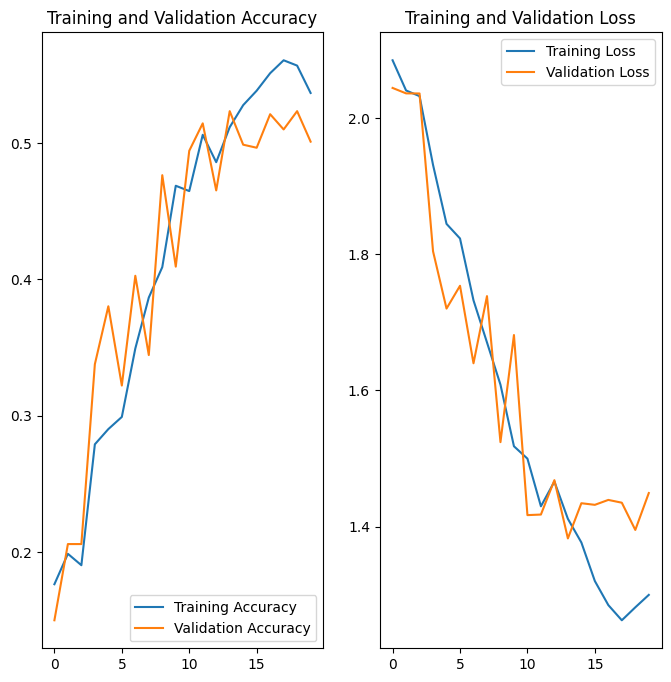

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

**Finding on the first base model**

- The model is overfitting because we can also see difference in loss functions in training.
- As the training accuracy 53% increases linearly over time, where as the validation accuracy increases at 50% accuracy in training process.
- As the training loss decreases with epochs the validation loss increases
- We can see that our model is overfitting. So let's use some data augumentation technique to resolve the overfitting problem

### **Choosing an appropriate data augmentation strategy to resolve underfitting/overfitting**


Data augmentation takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

In [20]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

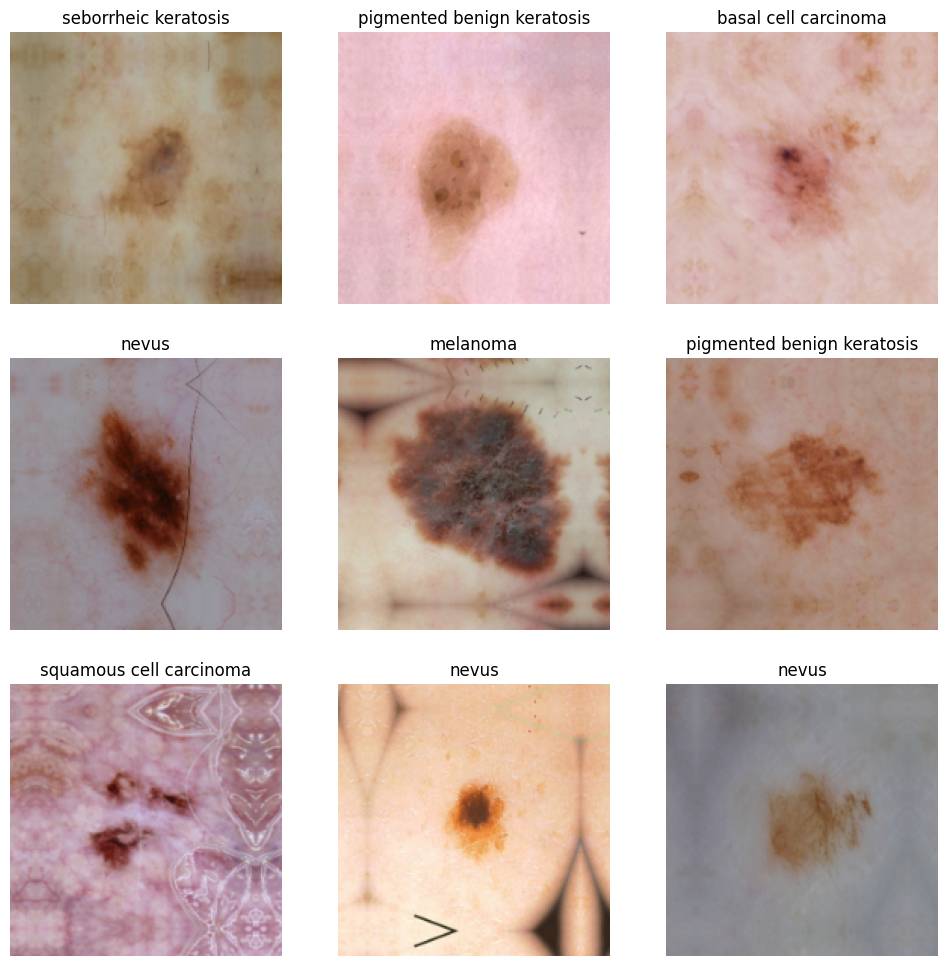

In [21]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [22]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
# CNN Model
num_classes=  9
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

# scaling the pixel values from 0-255 to 0-1
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# Convolution layer with 64 features, 7x7 filter and relu activation with 2x2 pooling
model.add(Conv2D(filters = 64, kernel_size = (7,7),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# Convolution layer with 16 features, 3x3 filter and relu activation with 2x2 pooling
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# Convolution layer with 128 features, 11x11 filter and relu activation with 2x2 pooling
model.add(Conv2D(filters = 128, kernel_size = (11,11),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# Convolution layer with 256 features, 3x3 filter and relu activation with 2x2 pooling
model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(num_classes))
model.add(Activation('softmax'))



### Compiling the model

In [23]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

### Training the model

In [24]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 7s 65ms/step - loss: 2.0577 - accuracy: 0.1830 - val_loss: 2.0287 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 3s 58ms/step - loss: 2.0018 - accuracy: 0.2321 - val_loss: 2.0029 - val_accuracy: 0.2461
Epoch 3/20
56/56 [==============================] - 3s 58ms/step - loss: 1.8840 - accuracy: 0.2751 - val_loss: 1.7681 - val_accuracy: 0.3356
Epoch 4/20
56/56 [==============================] - 3s 58ms/step - loss: 1.7304 - accuracy: 0.3337 - val_loss: 1.6399 - val_accuracy: 0.4027
Epoch 5/20
56/56 [==============================] - 3s 55ms/step - loss: 1.6347 - accuracy: 0.3901 - val_loss: 1.5809 - val_accuracy: 0.3915
Epoch 6/20
56/56 [==============================] - 3s 55ms/step - loss: 1.6061 - accuracy: 0.4085 - val_loss: 1.6098 - val_accuracy: 0.3893
Epoch 7/20
56/56 [==============================] - 3s 56ms/step - loss: 1.5339 - accuracy: 0.4520 - val_loss: 1.5398 - val_accuracy: 0.4586
Epoch 8/20
56

### Visualizing the results

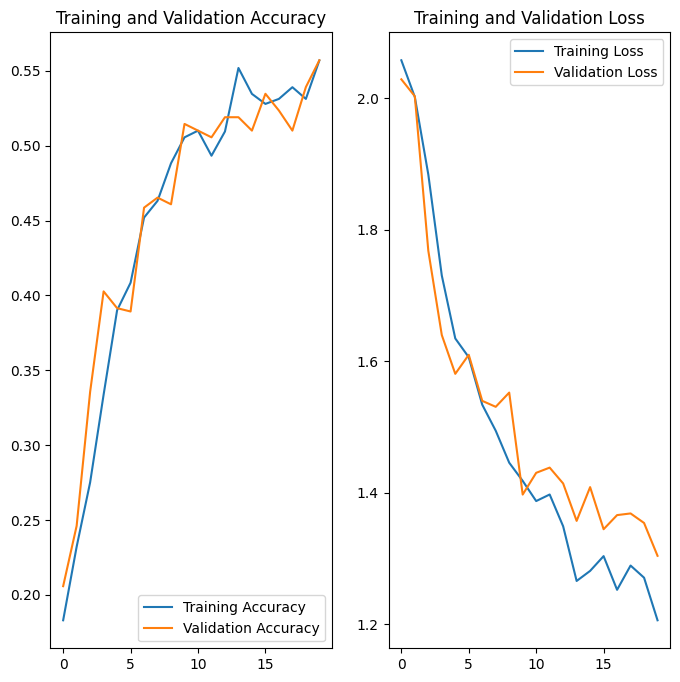

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Finding on the Second base model**

- After using data augmentation we can see that our training accuracy has decrease. Our training accuracy in this model is 55.69%.
- Our validation accuracy has also decrease now the validation accuracy is 55.70%, Which shows there are no big difference in our training and validation accuracies. So our overfitting problem is fixed.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [26]:
## Your code goes here.
path_lst = []
lesion_lst = []

for class_name in class_names:
    for img_obj in data_dir_train.glob(class_name + "/*.jpg"):
        path_lst.append(str(img_obj))
        lesion_lst.append(class_name)

# Creating dataframe
dataframe_dict_original = dict(zip(path_lst, lesion_lst))
original_df = pd.DataFrame(list(dataframe_dict_original.items()), columns = ['path', 'Label'])
original_df

,path,Label
0,/content/drive/MyDrive/MS Assignments/Melanoma...,actinic keratosis
1,/content/drive/MyDrive/MS Assignments/Melanoma...,actinic keratosis
2,/content/drive/MyDrive/MS Assignments/Melanoma...,actinic keratosis
3,/content/drive/MyDrive/MS Assignments/Melanoma...,actinic keratosis
4,/content/drive/MyDrive/MS Assignments/Melanoma...,actinic keratosis
...,...,...
2234,/content/drive/MyDrive/MS Assignments/Melanoma...,vascular lesion
2235,/content/drive/MyDrive/MS Assignments/Melanoma...,vascular lesion
2236,/content/drive/MyDrive/MS Assignments/Melanoma...,vascular lesion
2237,/content/drive/MyDrive/MS Assignments/Melanoma...,vascular lesion


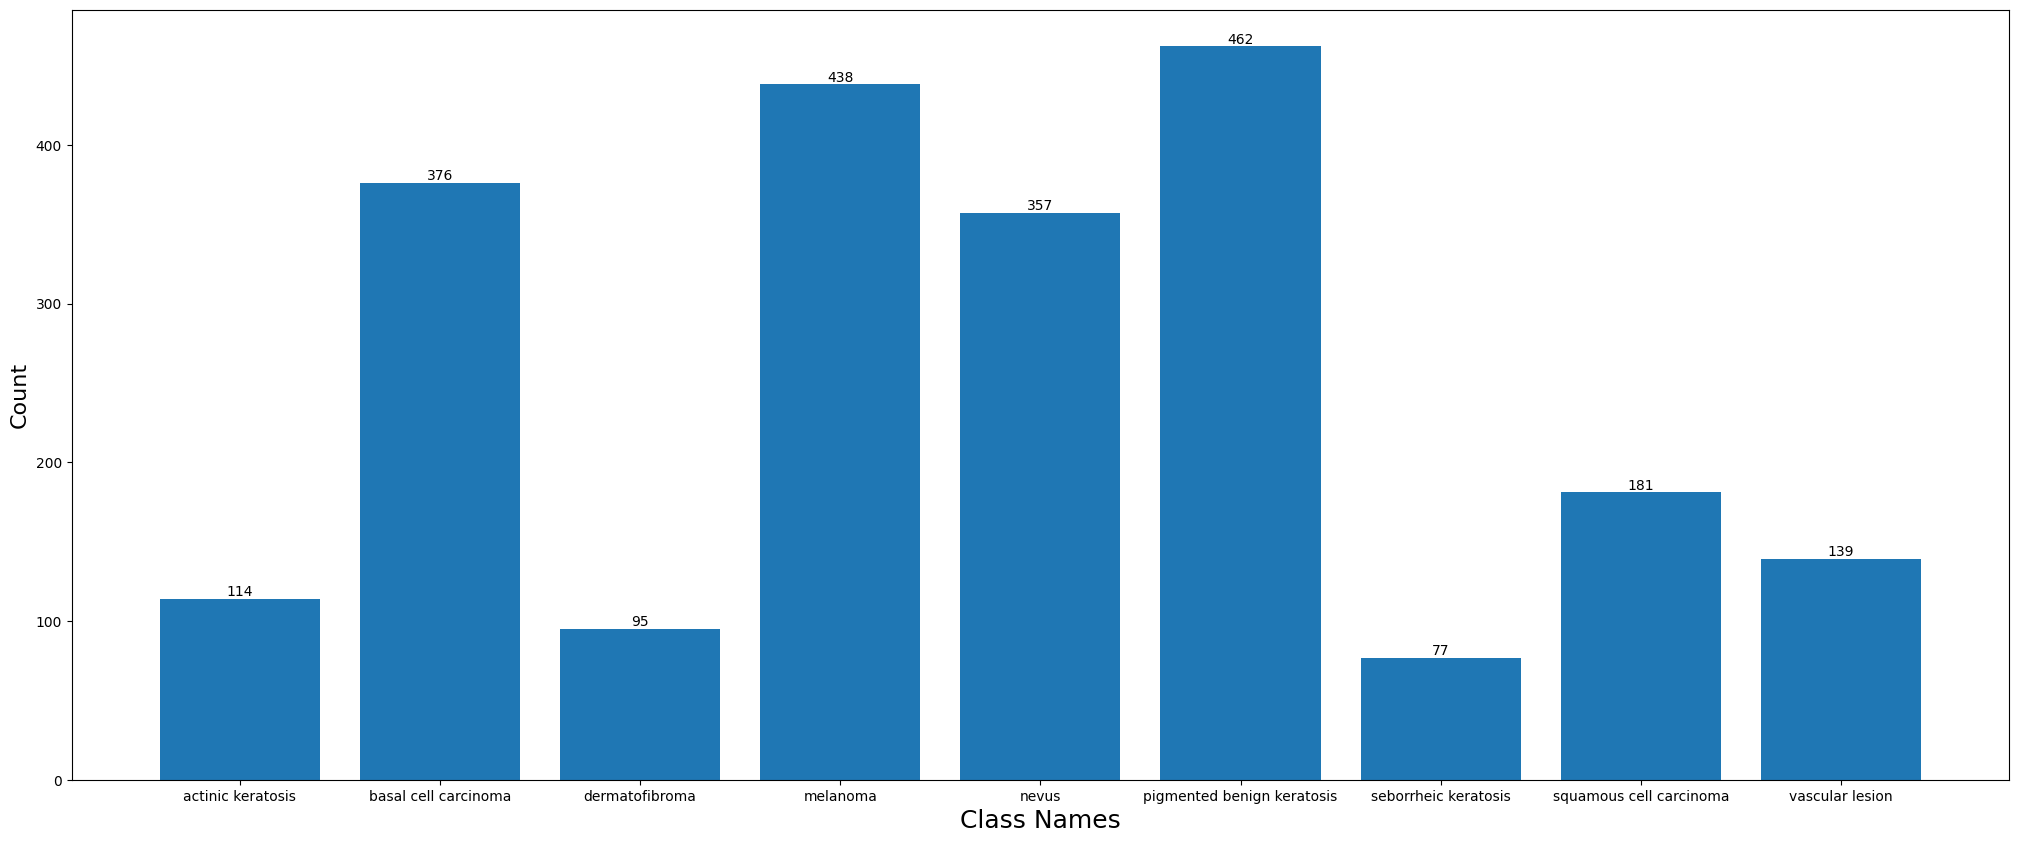

In [27]:
# Visualizing the class counts which present in our data.
count = []

for class_name in class_names:
    count.append(len(list(data_dir_train.glob(class_name + '/*.jpg'))))

plt.figure(figsize=(25, 10))
bars = plt.bar(class_names, count)

# Annotate the bars with their values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')

plt.xlabel("Class Names", fontsize = 18)
plt.ylabel("Count", fontsize = 16)
plt.show()

In [28]:
# Let's Use the value_counts() to get the value counts for every class_name.
original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
####   - **seborrheic keratosis -> 77**
#### - Which classes dominate the data in terms proportionate number of samples?
####   - **pigmented benign keratosis -> 462**

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [29]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [30]:
path_to_training_dataset="/content/drive/MyDrive/MS Assignments/Melanoma detection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for class_name in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + class_name, save_format = 'jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/MS Assignments/Melanoma detection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78EC34F3AC50>: 100%|██████████| 500/500 [00:25<00:00, 19.61 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/MS Assignments/Melanoma detection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x78EC34F7FA60>: 100%|██████████| 500/500 [00:21<00:00, 22.88 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/MS Assignments/Melanoma detection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78EC461305B0>: 100%|██████████| 500/500 [00:24<00:00, 20.03 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/MS Assignments/Melanoma detection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x78EC34F776D0>: 100%|██████████| 500/500 [01:14<00:00,  6.68 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/MS Assignments/Melanoma detection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78ECC0261150>: 100%|██████████| 500/500 [01:15<00:00,  6.59 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/MS Assignments/Melanoma detection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78ECC024A3B0>: 100%|██████████| 500/500 [00:18<00:00, 26.78 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/MS Assignments/Melanoma detection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x78ECC04AF2B0>: 100%|██████████| 500/500 [00:39<00:00, 12.72 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/MS Assignments/Melanoma detection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78ECC0138C70>: 100%|██████████| 500/500 [00:20<00:00, 24.53 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/MS Assignments/Melanoma detection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x78EC4672D5D0>: 100%|██████████| 500/500 [00:19<00:00, 25.98 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [31]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [32]:
from glob import glob

path_list_new = list(glob(os.path.join(data_dir_train, '*','output', '*.jpg')))
path_list_new

['/content/drive/MyDrive/MS Assignments/Melanoma detection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0026456.jpg_6553dcca-d488-4ef2-b30e-986f25d9dc00.jpg',
 '/content/drive/MyDrive/MS Assignments/Melanoma detection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0033254.jpg_7550386e-2df4-4dc9-9be6-a47b4e0d4bed.jpg',
 '/content/drive/MyDrive/MS Assignments/Melanoma detection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0032545.jpg_90bff6f6-9a75-48d8-8ae7-988739987b95.jpg',
 '/content/drive/MyDrive/MS Assignments/Melanoma detection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0033591.jpg_6bd8fe44-c40c-4dab-b55f-d7ff1dcd7161.jpg',
 '/content/drive/MyDrive/MS Assignments/Melanoma detection/S

In [33]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',


In [34]:
dataframe_dict_original = dict(zip(path_list_new, lesion_list_new))
new_original_df = pd.DataFrame(list(dataframe_dict_original.items()), columns = ['Path', 'Label'])
new_original_df

,Path,Label
0,/content/drive/MyDrive/MS Assignments/Melanoma...,vascular lesion
1,/content/drive/MyDrive/MS Assignments/Melanoma...,vascular lesion
2,/content/drive/MyDrive/MS Assignments/Melanoma...,vascular lesion
3,/content/drive/MyDrive/MS Assignments/Melanoma...,vascular lesion
4,/content/drive/MyDrive/MS Assignments/Melanoma...,vascular lesion
...,...,...
4495,/content/drive/MyDrive/MS Assignments/Melanoma...,seborrheic keratosis
4496,/content/drive/MyDrive/MS Assignments/Melanoma...,seborrheic keratosis
4497,/content/drive/MyDrive/MS Assignments/Melanoma...,seborrheic keratosis
4498,/content/drive/MyDrive/MS Assignments/Melanoma...,seborrheic keratosis


### Lets see the distribution of augmented data after adding new images to the original training data.

In [35]:
train_dir_path = '/content/drive/MyDrive/MS Assignments/Melanoma detection/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
for class_name in class_names:
  out_dir = train_dir_path + '/' + class_name + '/output/'
  class_dir = pathlib.Path(train_dir_path)
  class_dir_out = pathlib.Path(out_dir)
  length = len(list(class_dir.glob(class_name + '/*.jpg')))
  length_out = len(list(class_dir_out.glob('*.jpg')))
  length_total = length + length_out
  print(f'{class_name} : {length_total}')


actinic keratosis : 614
basal cell carcinoma : 876
dermatofibroma : 595
melanoma : 938
nevus : 857
pigmented benign keratosis : 962
seborrheic keratosis : 577
squamous cell carcinoma : 681
vascular lesion : 639


In [36]:
data_dir_train1 = pathlib.Path('/content/drive/MyDrive/MS Assignments/Melanoma detection/Skin cancer ISIC The International Skin Imaging Collaboration/Train/output' )
for class_name in class_names:
  for dir_path in data_dir_train1.glob(class_name + "/*.jpg"):
    path_lst.append(str(dir_path))
    lesion_lst.append(class_name)

In [37]:
len(dataframe_dict_original)

4500

In [38]:
dataframe_dict_original = dict(zip(path_lst, lesion_lst))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/content/drive/MyDrive/MS Assignments/Melanoma...,actinic keratosis
1,/content/drive/MyDrive/MS Assignments/Melanoma...,actinic keratosis
2,/content/drive/MyDrive/MS Assignments/Melanoma...,actinic keratosis
3,/content/drive/MyDrive/MS Assignments/Melanoma...,actinic keratosis
4,/content/drive/MyDrive/MS Assignments/Melanoma...,actinic keratosis
...,...,...
2234,/content/drive/MyDrive/MS Assignments/Melanoma...,vascular lesion
2235,/content/drive/MyDrive/MS Assignments/Melanoma...,vascular lesion
2236,/content/drive/MyDrive/MS Assignments/Melanoma...,vascular lesion
2237,/content/drive/MyDrive/MS Assignments/Melanoma...,vascular lesion


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [39]:
batch_size = 32
img_height = 180
img_width = 180

In [40]:
data_dir_train1 = pathlib.Path("/content/drive/MyDrive/MS Assignments/Melanoma detection/Skin cancer ISIC The International Skin Imaging Collaboration/Train")

In [41]:
data_dir_train1

PosixPath('/content/drive/MyDrive/MS Assignments/Melanoma detection/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

#### **Todo:** Create a training dataset

In [42]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [43]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [52]:
# CNN Model
num_classes=  9
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

# scaling the pixel values from 0-255 to 0-1
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# Convolution layer with 64 features, 7x7 filter and relu activation with 2x2 pooling
model.add(Conv2D(filters = 64, kernel_size = (7,7),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# Convolution layer with 16 features, 3x3 filter and relu activation with 2x2 pooling
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# Convolution layer with 128 features, 11x11 filter and relu activation with 2x2 pooling
model.add(Conv2D(filters = 128, kernel_size = (11,11),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# Convolution layer with 256 features, 3x3 filter and relu activation with 2x2 pooling
model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [53]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [54]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 40s 204ms/step - loss: 2.1795 - accuracy: 0.1380 - val_loss: 2.1819 - val_accuracy: 0.1247
Epoch 2/30
169/169 [==============================] - 36s 208ms/step - loss: 1.9753 - accuracy: 0.2324 - val_loss: 1.7402 - val_accuracy: 0.3586
Epoch 3/30
169/169 [==============================] - 35s 201ms/step - loss: 1.7098 - accuracy: 0.3477 - val_loss: 1.5688 - val_accuracy: 0.3912
Epoch 4/30
169/169 [==============================] - 36s 210ms/step - loss: 1.5939 - accuracy: 0.3930 - val_loss: 1.4554 - val_accuracy: 0.4269
Epoch 5/30
169/169 [==============================] - 35s 200ms/step - loss: 1.4606 - accuracy: 0.4206 - val_loss: 1.3706 - val_accuracy: 0.4477
Epoch 6/30
169/169 [==============================] - 56s 328ms/step - loss: 1.3891 - accuracy: 0.4414 - val_loss: 1.7226 - val_accuracy: 0.3653
Epoch 7/30
169/169 [==============================] - 37s 211ms/step - loss: 1.3312 - accuracy: 0.4694 - val_loss: 1.2676 - val_ac

#### **Todo:**  Visualize the model results

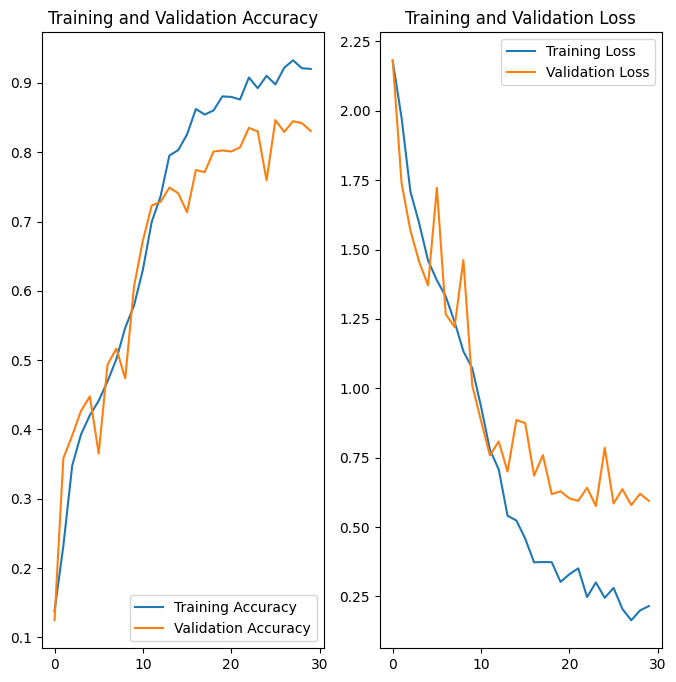

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



#### **Findings :**
- After using class rebalance we can see that our training accuracy is 93% and validation accuracy is 83%.
- As the training loss decreases with epochs the validation loss also decreases.
- The difference in accuracy between training and validation accuracy is very less
- Class rebalancing not only reduced overfitting, it also improved the accuracy from **48%** to **82%**.

### Validations on Test data

In [59]:
from glob import glob
from tensorflow.keras.preprocessing.image import load_img
for counter in range(0, 20):
  rand_cnt = np.random.randint(0, 9)
  Test_image_path = os.path.join(data_dir_test, class_names[rand_cnt], '*')
  Test_image = glob(Test_image_path)
  Test_image = load_img(Test_image[-1],target_size=(180,180,3))
  img = np.expand_dims(Test_image,axis=0)
  pred = model.predict(img)
  pred = np.argmax(pred)
  pred_class = class_names[pred]
  print("Actual Class "+ class_names[rand_cnt] +'\n'+ "Predictive Class "+pred_class )

1/1 [==============================] - 0s 24ms/step
Actual Class vascular lesion
Predictive Class vascular lesion
1/1 [==============================] - 0s 20ms/step
Actual Class squamous cell carcinoma
Predictive Class squamous cell carcinoma
1/1 [==============================] - 0s 17ms/step
Actual Class seborrheic keratosis
Predictive Class melanoma
1/1 [==============================] - 0s 33ms/step
Actual Class seborrheic keratosis
Predictive Class melanoma
1/1 [==============================] - 0s 29ms/step
Actual Class melanoma
Predictive Class nevus
1/1 [==============================] - 0s 28ms/step
Actual Class dermatofibroma
Predictive Class dermatofibroma
1/1 [==============================] - 0s 31ms/step
Actual Class basal cell carcinoma
Predictive Class basal cell carcinoma
1/1 [==============================] - 0s 32ms/step
Actual Class squamous cell carcinoma
Predictive Class squamous cell carcinoma
1/1 [==============================] - 0s 39ms/step
Actual Class nevu